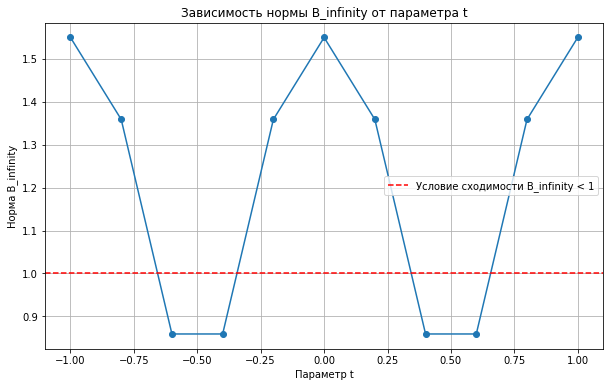

Наибольшее значение параметра t, при котором выполнено условие сходимости: 0.6
Решение системы для t = 0.6:
[1.96229146 2.56251936 1.98922606]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Задание матрицы B(t) и вектора c в явном виде для варианта 5.4.2
def B_matrix(t):
    return np.array([
        [0.2, 0.3, -0.1],
        [np.cos(6 * np.pi * t), -0.25, 0.3],
        [0.2, np.sin(10 * np.pi * t), 0.3]
    ])

c = np.array([1, 2, 1])

# Норма бесконечности
def infinity_norm(matrix):
    return np.max(np.sum(np.abs(matrix), axis=1))

# Функция приведения матрицы A к верхнетреугольному виду (Метод Гаусса)
def gaussian_elimination(A: np.ndarray, b: np.ndarray):
    n = A.shape[0]
    for i in range(n):
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            b[j] -= factor * b[i]
            A[j] -= factor * A[i]
    return A, b

# Решение системы с помощью метода Гаусса
def solve_gaussian(A: np.ndarray, b: np.ndarray):
    A_upper, b_upper = gaussian_elimination(A.copy(), b.copy())
    n = A.shape[0]
    x = np.zeros(n)
    x[-1] = b_upper[-1] / A_upper[-1, -1]
    for i in range(n - 2, -1, -1):
        x[i] = (b_upper[i] - np.dot(A_upper[i, i+1:], x[i+1:])) / A_upper[i, i]
    return x



# Метод Зейделя
def seidel_method(B, c, x0, eps=1e-7):
    x = x0.copy()
    for _ in range(1000):  # Максимальное число итераций
        x_new = x.copy()
        for i in range(len(B)):
            x_new[i] = np.dot(B[i], x_new) + c[i]
        if np.linalg.norm(x_new - x, ord=np.inf) < eps:
            break
        x = x_new
    return x

t_values = np.arange(-1, 1.2, 0.2)
norms = []


for t in t_values:
    B = B_matrix(t)
    norms.append(infinity_norm(B))



# Построение графика зависимости нормы B_infty от параметра t
plt.figure(figsize=(10, 6))
plt.plot(t_values, norms, marker='o')
plt.axhline(1, color='r', linestyle='--', label='Условие сходимости B_infinity < 1')
plt.xlabel('Параметр t')
plt.ylabel('Норма B_infinity')
plt.title('Зависимость нормы B_infinity от параметра t')
plt.legend()
plt.grid(True)
plt.show()

# Поиск наибольшего значения t, при котором выполнено условие сходимости
convergent_t_values = [t for t, norm in zip(t_values, norms) if norm < 1]
if convergent_t_values:
    max_convergent_t = max(convergent_t_values)

    # Решение системы для наибольшего значения t, при котором выполнено условие сходимости
    B = B_matrix(max_convergent_t)
    x_seidel_converged = seidel_method(B, c, np.zeros(len(c)))

    print(f'Наибольшее значение параметра t, при котором выполнено условие сходимости: {round(max_convergent_t, 2)}')
    print(f'Решение системы для t = {round(max_convergent_t, 2)}:\n{x_seidel_converged}')
else:
    print('Нет значений t, при которых выполнено условие сходимости.')